# **Fake News Classifier**

**Context**: This project uses natural language processing (NLP) to analyze the text of news content and identify patterns that indicate whether the information is truthful or deceptive.

 **Objective**: Classify news headlines as real or fake using machine learning.

**Dataset**: Fake and Real News Classifier

**Source**: https://www.kaggle.com/datasets/hrishikeshkini/fake-news-classifier

**Format**: CSV  


 **Key Concepts**: Text preprocessing, TF-IDF vectorization, Naive Bayes, text classification.

**Tools**: Scikit-learn and NLTK.

## Importing Libraries

In [4]:
# Read the data into a dataframe
# I will import a data analysis package

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

## Loading Data

In [3]:
News_Classifier = pd.read_csv('train.csv')     # reading a dataset

In [4]:
News_Classifier.head()         # viewing the first five rows

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Exploratory Data Analysis

In [5]:
print(News_Classifier.columns)
print(News_Classifier.info())
print(News_Classifier['label'].value_counts())        # Real vs Fake

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None
label
1    10413
0    10387
Name: count, dtype: int64


In [6]:
print(News_Classifier['text'].iloc[0])      # viewing the first article

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails 

#### 1. Checking Class Distribution (Fake vs Real)

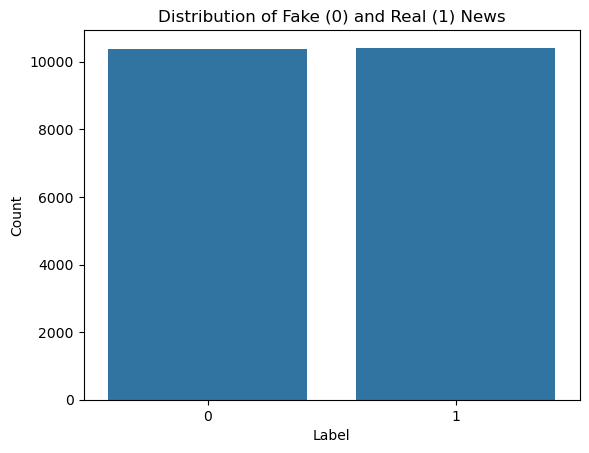

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=News_Classifier)
plt.title("Distribution of Fake (0) and Real (1) News")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

#### 2. Understanding the length of words per headline

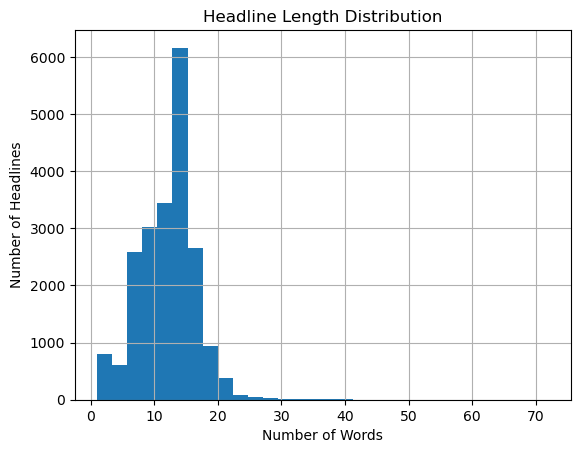

In [8]:
News_Classifier['text_length'] = News_Classifier['title'].apply(lambda x: len(str(x).split()))

News_Classifier['text_length'].hist(bins=30)
plt.title("Headline Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Headlines")
plt.show()

#### 3. Comparing text lengths for fake vs real news

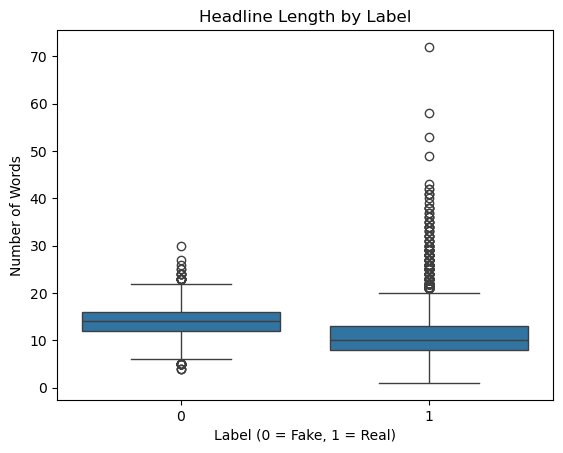

In [10]:
sns.boxplot(x='label', y='text_length', data=News_Classifier)
plt.title("Headline Length by Label")
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Number of Words")
plt.show()

In [12]:
!pip install wordcloud

## Preprocessing the Text

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if pd.isnull(text):  # handle NaN values
        return ""
    text = text.lower()
    text = re.sub(r'@\w+', '', text)        # remove @mentions
    text = "".join([char for char in text if char not in string.punctuation])      # remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

News_Classifier['clean_text'] = News_Classifier['title'].apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### 4. Words commonly used in Fake vs Real Headlines

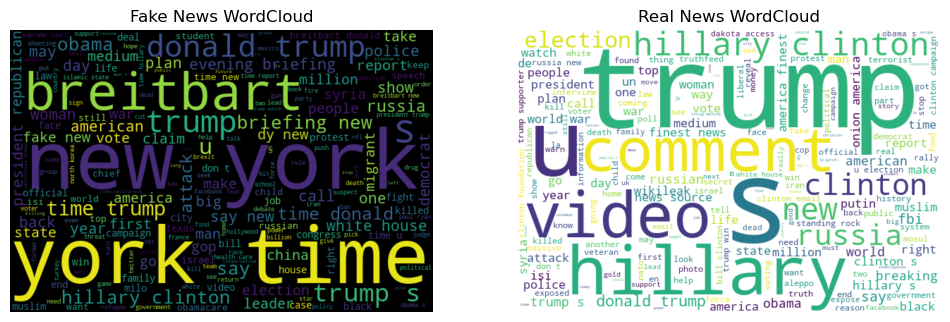

In [15]:
from collections import Counter
from wordcloud import WordCloud

# Join all text by label
fake_words = " ".join(News_Classifier[News_Classifier['label'] == 0]['clean_text'])
real_words = " ".join(News_Classifier[News_Classifier['label'] == 1]['clean_text'])

# Generate word clouds
wordcloud_fake = WordCloud(width=600, height=400, background_color='black').generate(fake_words)
wordcloud_real = WordCloud(width=600, height=400, background_color='white').generate(real_words)

# Plot fake news words
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Fake News WordCloud')
plt.axis('off')

# Plot real news words
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Real News WordCloud')
plt.axis('off')
plt.show()

In [10]:
News_Classifier_2 = News_Classifier

In [11]:
News_Classifier_2.head()

,id,title,author,text,label,clean_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide didn’t even see comey’s letter ...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitbart
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fired
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilian killed single u airstrike identified
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished sto...


## Using TF-IDF Vectorization to Convert the text to numbers
 

In [14]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(News_Classifier['clean_text'])
y = News_Classifier['label']

## Splitting the Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Naive Bayes Model

In [18]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

## Evaluating the Model

In [19]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2132
           1       0.94      0.83      0.88      2028

    accuracy                           0.89      4160
   macro avg       0.90      0.89      0.89      4160
weighted avg       0.90      0.89      0.89      4160

Accuracy: 0.8915865384615385


 ## **Insights:** 
 #### a. I successfully built a model that can predict if a headline is fake or real. I was able to get high accuracy of almost 9 out of 10 times. This project shows how machine learning and text cleaning can help fight misinformation online.
 #### b. Fake news headlines are often longer and repeat media names to seem credible, while real news uses more varied language due to professional editing standards.